# Diabetes data

Sklearn diabetes dataset (`sklearn.datasets.load_diabetes`) is a normalised version of this [raw data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt).

See [sklearn](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) for details of the data.

### Target

* Column 11 is a quantitative measure of disease progression one year after baseline

### Attribute Information

* **age** age in years
* **sex**
* **bmi** body mass index
* **bp** average blood pressure
* **s1** tc, T-Cells (a type of white blood cells)
* **s2** ldl, low-density lipoproteins
* **s3** hdl, high-density lipoproteins
* **s4** tch, thyroid stimulating hormone
* **s5** ltg, lamotrigine
* **s6** glu, blood sugar level

## Notes on edits to data

- should we only allow matplotlib?
- i've included the nulls below, but we can remove that in favour of normalisation if we want
- BMI and blood pressure would possibly reward log normalisation as they are, but i've made s5 into a feature that definitely needs it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'S1'}>,
        <AxesSubplot:title={'center':'S2'}>],
       [<AxesSubplot:title={'center':'S3'}>,
        <AxesSubplot:title={'center':'S4'}>,
        <AxesSubplot:title={'center':'S5'}>],
       [<AxesSubplot:title={'center':'S6'}>,
        <AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>]], dtype=object)

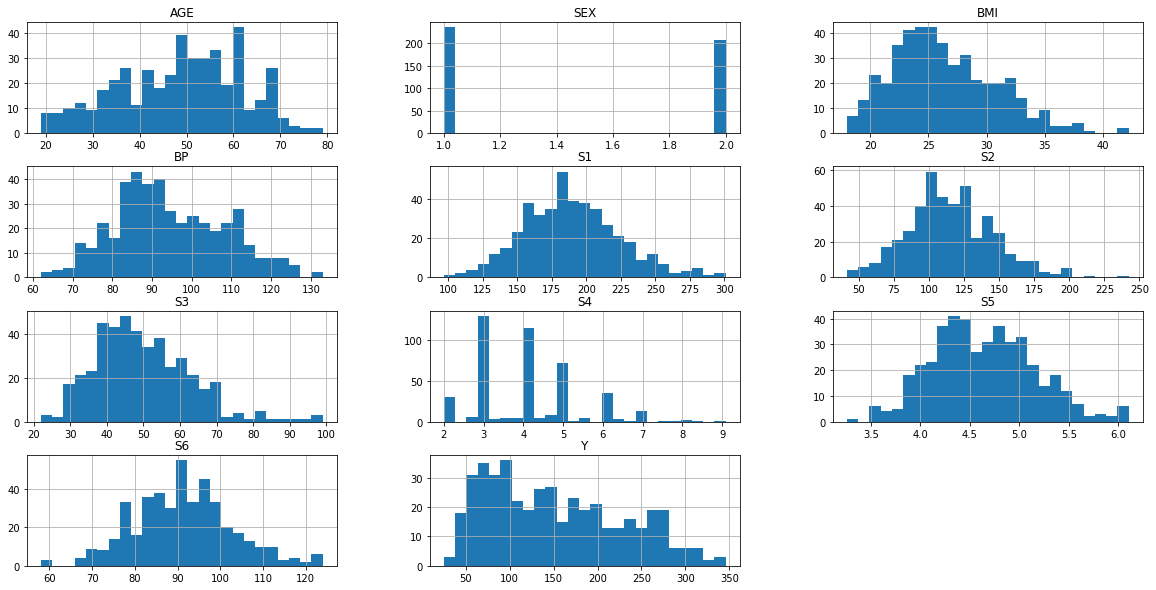

In [4]:
df.hist(bins=25, figsize=(20,10))

In [5]:
# add some nulls

df = df * np.random.choice([1, np.nan], size=df.shape, p=[0.9, 0.1])
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,NaN,101.0,157.0,93.2,38.0,NaN,4.8598,87.0,151.0
1,48.0,1.0,NaN,87.0,183.0,103.2,70.0,3.0,3.8918,NaN,75.0
2,72.0,NaN,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


<AxesSubplot:>

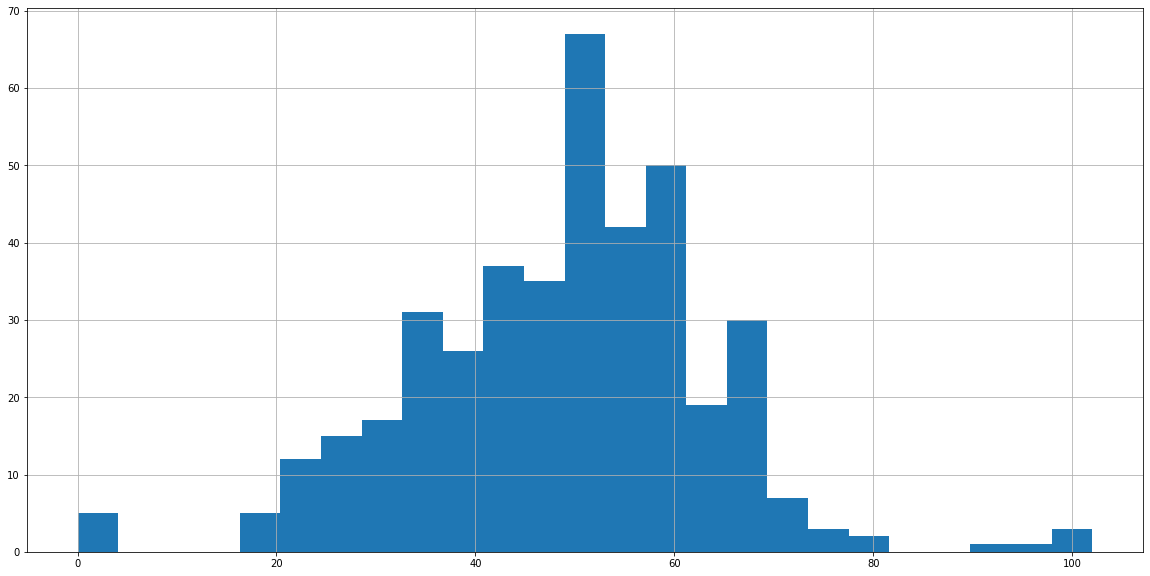

In [6]:
# add unlikely ages

age_sample_indices = df.sample(10).index

df.loc[age_sample_indices[:5], "AGE"] = np.random.randint(0, 5, 5)

df.loc[age_sample_indices[5:], "AGE"] = np.random.randint(90, 110, 5)

df["AGE"].hist(bins=25, figsize=(20,10))

In [7]:
# force BMI to string dtype

df["BMI"].fillna(" ", inplace=True)

In [8]:
# create a lognormal feature

df["S5"] = (df["S5"] * np.random.lognormal(3, 1, df.shape[0]))

In [9]:
df.to_csv("diabetes.csv", index=False)